In [1]:
# HSV Color
import cv2
import numpy as np

for i in range(1,12):
    frame = cv2.imread("./images/{}.jpg".format(i))
    new_width = 640
    new_height = 480

    # Resize the frame
    frame = cv2.resize(frame, (new_width, new_height))
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    blue = 142
    lower = np.array([0,0,40])
    upper = np.array([225,225,blue])
    mask = cv2.inRange(hsv, lower, upper)
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
#     print(type(contours))

    c = 0
    for contour in contours:
        area = cv2.contourArea(contour)
        
        if area > 2000:
            temp_blue = blue
            rect = cv2.boundingRect(contour)
            x, y, w, h = rect
            roi = frame[y:y+h, x:x+w]
            h_roi = hsv[y:y+h, x:x+w]
            
            # If the area is tooooooooo large. The contour contains more than one object, do it again!
            if area > 60000:
                segment = []
                while len(segment) < 1:
                    temp_blue -= 3
                    lower = np.array([0,0,40])
                    upper = np.array([225,225,temp_blue])
                    mask = cv2.inRange(h_roi, lower, upper)
                    new_contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
                    filtered_contours = []
                    for cont in new_contours:
                        narea = cv2.contourArea(cont)
                        if narea > 2000:
                            filtered_contours.append(cont)
                    if len(filtered_contours) > 1:
                        segment += filtered_contours
                        
                for cont in segment:
                    rect = cv2.boundingRect(cont)
                    x, y, w, h = rect
                    new_roi = roi[y:y+h, x:x+w]
                    cv2.imwrite('./res/{}-object{}.jpg'.format(i,c), new_roi)
                    c += 1
#                     cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                        
                continue 


            cv2.imwrite('./res/{}-object{}.jpg'.format(i,c), roi)
            c += 1
#             cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
             

#     cv2.imwrite('./res/segment{}.jpg'.format(i), frame)
    cv2.destroyAllWindows()

Loading CLIP Model...


ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


Images: 46


C:\Users\Anna Feng\AppData\Local\Temp\ipykernel_16256\926398296.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = image.resize((width, height), Image.ANTIALIAS)


n_img:  1-object0.jpg
n_img:  1-object1.jpg
n_img:  1-object2.jpg
n_img:  1-object3.jpg
n_img:  10-object0.jpg
n_img:  10-object1.jpg
n_img:  10-object2.jpg
n_img:  10-object3.jpg
n_img:  10-object4.jpg
n_img:  11-object0.jpg
n_img:  11-object1.jpg
n_img:  11-object2.jpg
n_img:  11-object3.jpg
n_img:  2-object0.jpg
n_img:  2-object1.jpg
n_img:  2-object2.jpg
n_img:  2-object3.jpg
n_img:  3-object0.jpg
n_img:  3-object1.jpg
n_img:  3-object2.jpg
n_img:  3-object3.jpg
n_img:  4-object0.jpg
n_img:  4-object1.jpg
n_img:  4-object2.jpg
n_img:  4-object3.jpg
n_img:  5-object0.jpg
n_img:  5-object1.jpg
n_img:  5-object2.jpg
n_img:  6-object0.jpg
n_img:  6-object1.jpg
n_img:  6-object2.jpg
n_img:  6-object3.jpg
n_img:  7-object0.jpg
n_img:  7-object1.jpg
n_img:  7-object2.jpg
n_img:  8-object0.jpg
n_img:  8-object1.jpg
n_img:  8-object2.jpg
n_img:  8-object3.jpg
n_img:  8-object4.jpg
n_img:  8-object5.jpg
n_img:  9-object0.jpg
n_img:  9-object1.jpg
n_img:  9-object2.jpg
n_img:  9-object3.jpg


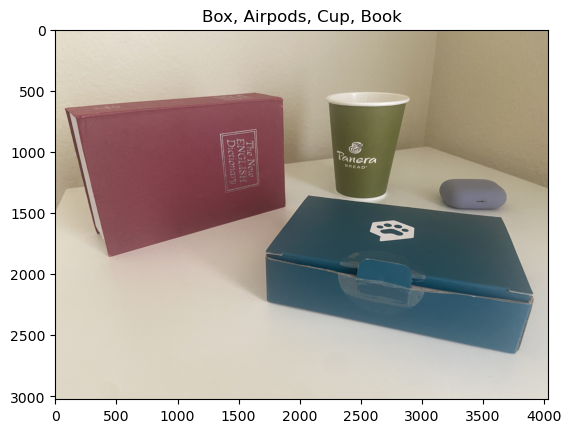

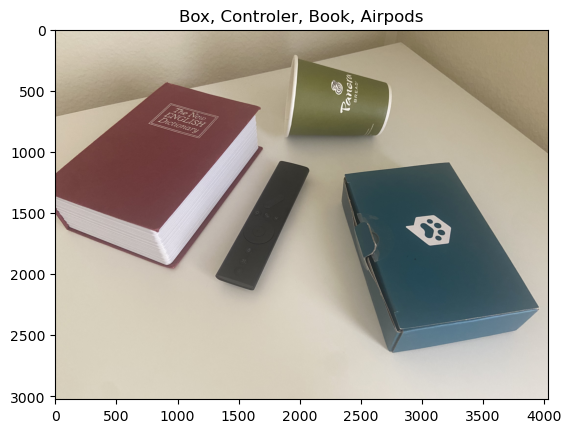

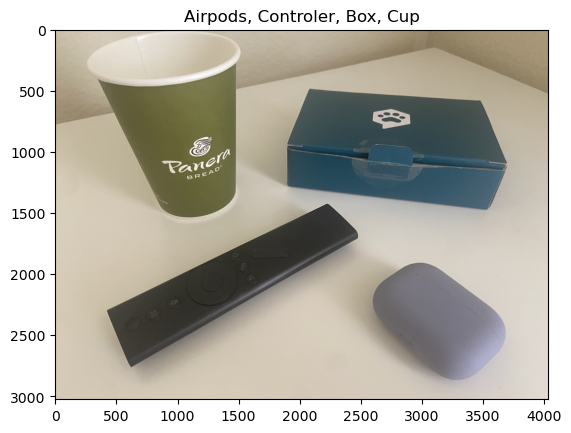

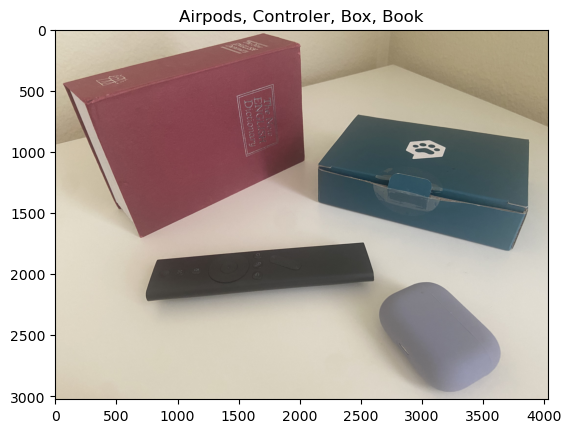

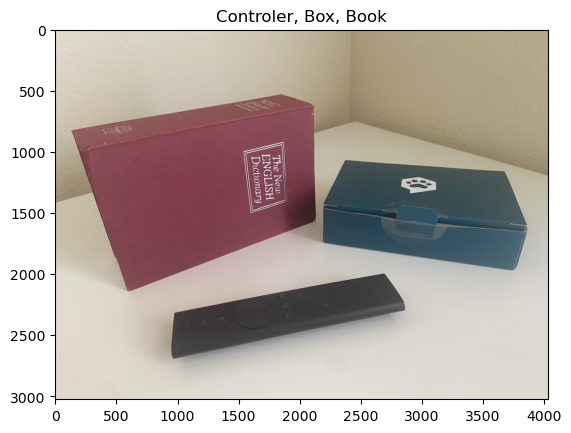

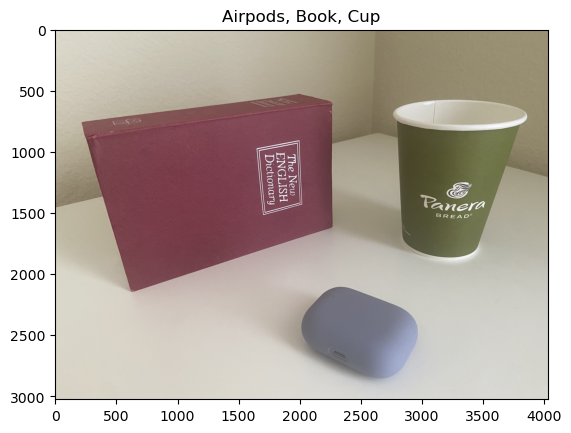

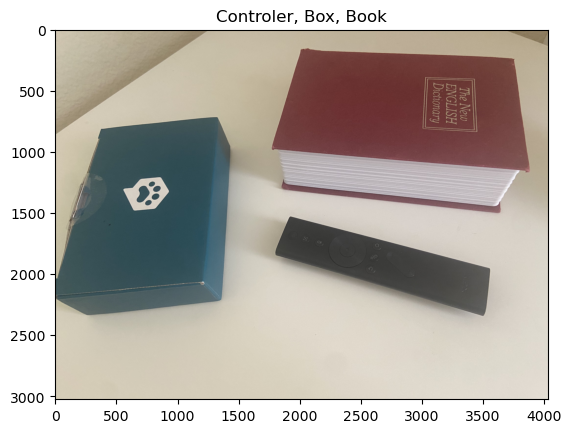

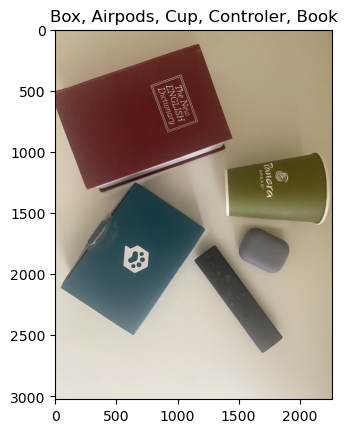

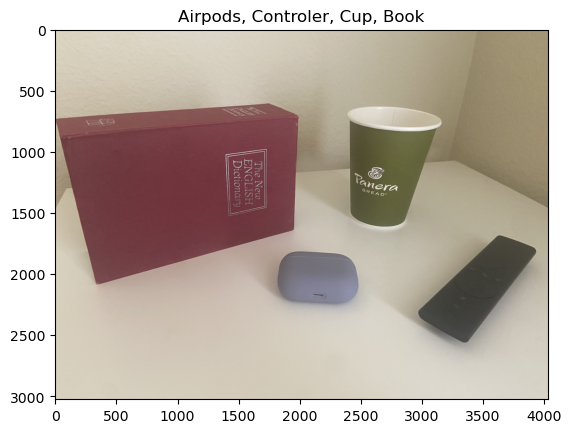

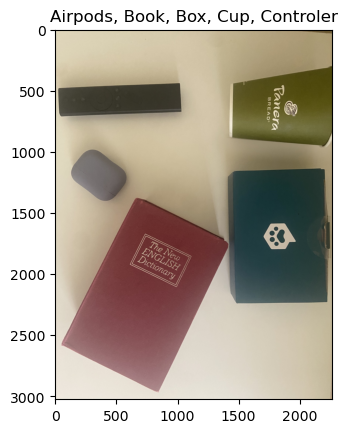

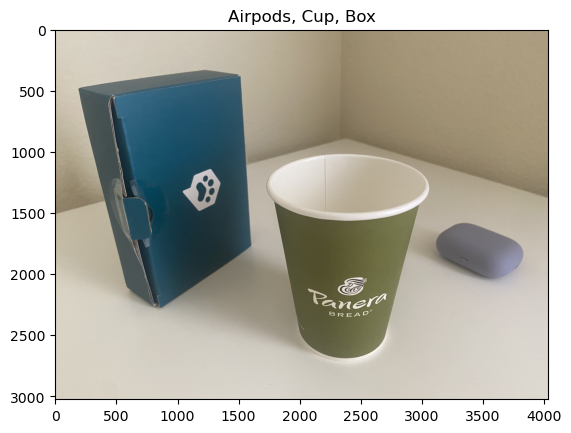

{'Box': ['1-object0.jpg', '10-object2.jpg', '11-object2.jpg', '11-object3.jpg', '2-object0.jpg', '3-object2.jpg', '4-object2.jpg', '5-object1.jpg', '6-object3.jpg', '7-object1.jpg', '8-object0.jpg'], 'Airpods': ['1-object1.jpg', '10-object0.jpg', '11-object0.jpg', '2-object3.jpg', '3-object0.jpg', '4-object0.jpg', '6-object0.jpg', '8-object1.jpg', '9-object0.jpg'], 'Cup': ['1-object2.jpg', '10-object3.jpg', '11-object1.jpg', '3-object3.jpg', '6-object2.jpg', '8-object2.jpg', '9-object2.jpg'], 'Book': ['1-object3.jpg', '10-object1.jpg', '2-object2.jpg', '4-object3.jpg', '5-object2.jpg', '6-object1.jpg', '7-object2.jpg', '8-object4.jpg', '8-object5.jpg', '9-object3.jpg'], 'Controler': ['10-object4.jpg', '2-object1.jpg', '3-object1.jpg', '4-object1.jpg', '5-object0.jpg', '7-object0.jpg', '8-object3.jpg', '9-object1.jpg']}


In [2]:
from sentence_transformers import SentenceTransformer, util
import matplotlib.pyplot as plt
from PIL import Image
import glob
import os
import numpy as np

def calculate_histogram(image_path, width, height):
    image = Image.open(image_path)
    image = image.resize((width, height), Image.ANTIALIAS)
    array = np.array(image)

    # Calculate histogram for each color channel
    hist_r, _ = np.histogram(array[:, :, 0], bins=256, range=[0, 256])
    hist_g, _ = np.histogram(array[:, :, 1], bins=256, range=[0, 256])
    hist_b, _ = np.histogram(array[:, :, 2], bins=256, range=[0, 256])

    # Concatenate the histograms for all color channels
    hist = np.concatenate((hist_r, hist_g, hist_b))

    # Normalize the histogram
    hist = hist.astype(float) / np.sum(hist)

    return hist

def compare_color_similarity(image_path1, image_path2, width, height):
    hist1 = calculate_histogram(image_path1, width, height)
    hist2 = calculate_histogram(image_path2, width, height)

    # Calculate Bhattacharyya coefficient
    similarity = np.sum(np.sqrt(hist1 * hist2))

    return similarity

def getMostSim(contains, objectpath,processed_images):
    
    most_sim = processed_images[0]
    max_score = 0
    # find images that has the largest image[0]
    for image in processed_images:
        if (image[1] <= 4 and image[2]<=4):
            continue
        image_path1 = objectpath[image[1]]
        image_path2 = objectpath[image[2]]
        similarity_score = compare_color_similarity(image_path1, image_path2, 500, 500)
#         print(most_sim)
        
        n_img = image_path2.replace('./res\\', '')
        img_num = n_img.split('-')[0]
        exist = contains[img_num]
        
        obj_name = image_path1.replace('./object\\', '')
        obj_name = obj_name.replace('@.jpg', '')

        score = (image[0]+2*similarity_score)/3
#         print("cur most_sim: ", most_sim, similarity_score)
        if ((most_sim[1] <= 4 and most_sim[2]<=4) or (score > max_score))and obj_name not in exist:
            most_sim = image
            max_score = score
    return max_score, most_sim


# Load the OpenAI CLIP Model
print('Loading CLIP Model...')
model = SentenceTransformer('clip-ViT-B-32')

# Next we compute the embeddings
# To encode an image, you can use the following code:
# from PIL import Image
# encoded_image = model.encode(Image.open(filepath))
image_names = list(glob.glob('./res/*.jpg'))
print("Images:", len(image_names))
objectpath = list(glob.glob('./object/*.jpg'))

correct_list = {"Box":[],
                "Airpods":[],
                "Cup": [],
                "Book":[],
                "Controler":[]}
contains = {'1':[], '2':[], '3':[], '4':[], '5':[], '6':[], '7':[], '8':[], '9':[], '10':[], '11':[]}

for imagepath in image_names:
    objectpath.append(imagepath)
    
    encoded_image = model.encode([Image.open(filepath) for filepath in objectpath], batch_size=128, convert_to_tensor=True, show_progress_bar=False)
    processed_images = util.paraphrase_mining_embeddings(encoded_image)
    
    score, most_sim = getMostSim(contains,objectpath,processed_images)
    
    _, image_id1, image_id2 = most_sim
    
    if image_id1 <= 4 and image_id2 <= 4:
        objectpath.pop()
        continue
        
    object_img = objectpath[image_id1]
    n_img = objectpath[image_id2].replace('./res\\', '')
    print("n_img: ",n_img)
    
    obj_name = object_img.replace('./object\\', '')
    obj_name = obj_name.replace('@.jpg', '')
    
    img_num = n_img.split('-')[0]

    if score > 0.65 and obj_name not in contains[img_num]:
        contains[img_num].append(obj_name)
    correct_list[obj_name].append(n_img)
            
    objectpath.pop()
    
delimiter = ', '
for key, value in contains.items():
    image_path = f"./images/{key}.jpg"
    image = plt.imread(image_path)
    plt.imshow(image)
    result = delimiter.join(value)
    plt.title(result)
    plt.show()
    
print(correct_list)

